In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.wkt import loads
from shapely.geometry import Point, Polygon
from osgeo import gdal, ogr

from weavingspace import TileUnit
from weavingspace import Tiling

In [3]:

anthromes_geom_gdf = gpd.read_file("C:/data/Anthromes-12k-DGG/an12_dgg_inputs.shp")

anthromes_geom_gdf
anthromes_geom_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
anthromes_bounds = anthromes_geom_gdf.geometry.total_bounds  #"a tuple containing minx, miny, maxx, maxy"
anthromes_bounds

array([-179.99898824,  -55.80556255,  179.99303127,   83.68858812])

In [10]:
anthromes_bounds[1] = -89.9
anthromes_bounds[3] = 89.9
anthromes_bounds

array([-179.99898824,  -89.9       ,  179.99303127,   89.9       ])

In [11]:




p1 = Point(anthromes_bounds[0], anthromes_bounds[3])
p2 = Point(anthromes_bounds[2], anthromes_bounds[3])
p3 = Point(anthromes_bounds[2], anthromes_bounds[1])
p4 = Point(anthromes_bounds[0], anthromes_bounds[1])

np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

bb_polygon = Polygon([np1, np2, np3, np4])

world_boundaries_gdf = gpd.GeoDataFrame(gpd.GeoSeries(bb_polygon), columns=['geometry'])
world_boundaries_gdf.crs = anthromes_geom_gdf.crs

# densify the results
# (results are equivalent to the world_boundaries_gdf, which was prepared ahead of time and stored in a file for the full dataset)
# code here draws upon https://gis.stackexchange.com/q/432939
from shapely.wkt import loads

def segmentize(geom):
    wkt = geom.wkt  # shapely Polygon to wkt
    geom = ogr.CreateGeometryFromWkt(wkt)  # create ogr geometry
    geom.Segmentize(0.1)  # densify geometry.. points every this so long.
    wkt2 = geom.ExportToWkt()  # ogr geometry to wkt
    new = loads(wkt2)  # wkt to shapely Polygon
    return new

world_boundaries_gdf['geometry'] = world_boundaries_gdf['geometry'].apply(segmentize)
world_boundaries_gdf

,geometry
0,"POLYGON ((-179.99899 89.90000, -179.89899 89.9..."


<AxesSubplot:>

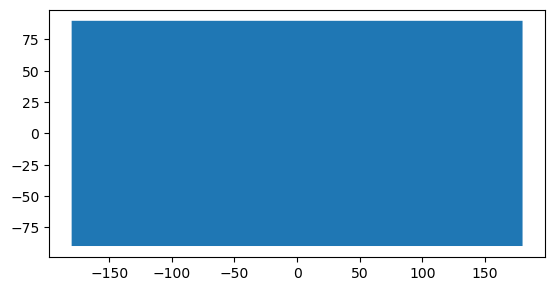

In [12]:
world_boundaries_gdf.plot()

In [14]:
world_boundaries_gdf.to_file("NACIS-2022/wgs84-densified-world-extent--drawn-from-anthromes-data-bbox.gpkg")

c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
